In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
%matplotlib inline

In [2]:
posting=pd.read_csv('G:/AnalytixLab/PYTHON & Machine learning/Assignment/M.L assignments/Text Mining (NLPNLG, Classification, Segmentation, Sentiment)/Analyzing online Job Postings/data job posts.csv')

In [3]:
posting

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\n...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\n...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [4]:
posting.dtypes

jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object

In [5]:
print('% of Null-values in each feature')
(posting.isnull().sum().sort_values(ascending=False)/posting.shape[0])*100

% of Null-values in each feature


Audience            96.631756
AnnouncementCode    93.642440
Attach              91.795169
Notes               88.363770
Eligibility         74.053997
Term                59.602126
Salary              49.360560
StartDate           49.081627
Duration            43.171412
AboutC              34.371875
JobDescription      20.483132
JobRequirment       13.272986
OpeningDate          3.715594
RequiredQual         2.547234
Deadline             0.342087
ApplicationP         0.315773
Location             0.168412
Title                0.147361
Company              0.036840
date                 0.000000
IT                   0.000000
Month                0.000000
Year                 0.000000
jobpost              0.000000
dtype: float64

In [6]:
jb_posting=posting.apply(lambda x: x.fillna(x.mode()[0]))

In [7]:
(jb_posting.isnull().sum()/jb_posting.shape[0])*100

jobpost             0.0
date                0.0
Title               0.0
Company             0.0
AnnouncementCode    0.0
Term                0.0
Eligibility         0.0
Audience            0.0
StartDate           0.0
Duration            0.0
Location            0.0
JobDescription      0.0
JobRequirment       0.0
RequiredQual        0.0
Salary              0.0
ApplicationP        0.0
OpeningDate         0.0
Deadline            0.0
Notes               0.0
AboutC              0.0
Attach              0.0
Year                0.0
Month               0.0
IT                  0.0
dtype: float64

Supervised learning classification models that are able to classify based on the job text data accurately, is it an IT job.

In [8]:
# Selecting important features.
import warnings
warnings.filterwarnings("ignore")

df=jb_posting[['IT','AboutC','RequiredQual','JobDescription','Audience','Company','Title','Notes','Salary','JobRequirment',
                'Eligibility','jobpost']]
df['IT'] = np.where(df.IT==False,0,1)

In [10]:
# train features and labels 

from sklearn.model_selection import train_test_split

y = df['IT']
X = df['RequiredQual']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16150,)
(2851,)
(16150,)
(2851,)


In [11]:
#Abbrevations and Words correction

import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

stop = set(nltk.corpus.stopwords.words('english'))

import string
def pre_process(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    return(text)


X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

X_train=pre_process(X_train)
X_test =pre_process(X_test)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

In [13]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())
dtm2.head(3)

,abilities,ability,able,abroad,academic,acca,accept,access,according,accountant,...,workload,world,would,write,writing,written,xhtml,xml,year,years
0,0.0,0.056860,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.062460
1,0.0,0.131091,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.099819,0.0,0.0,0.000000,0.072001
2,0.0,0.000000,0.0,0.0,0.0,0.41524,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.256036,0.000000


In [14]:
# ngram level tf-idf 

tfidf_vect_ngram =TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(jb_posting['RequiredQual'])
xtrain_tfidf_ngram =tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =tfidf_vect_ngram.transform(X_test)

In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics

def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [32]:
#Naive Bayes on Count Vectors and TF-IDF

from sklearn import naive_bayes
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)

NB  for L1, Count Vectors:  0.9028411083830234


In [33]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)


# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)


# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9438793405822519
LR  for L1, WordLevel TF-IDF:  0.9445808488249737
LR  for L1, N-Gram Vectors:  0.942827078218169


In [34]:
#XGBoosting

from xgboost import XGBClassifier

# XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.933707471062785
LR  for L1, WordLevel TF-IDF:  0.938618028761838
LR  for L1, N-Gram Vectors:  0.9372150122763943


In [35]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# Gradient Boosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(GradientBoostingClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Gradient Boosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(GradientBoostingClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9168712732374605
LR  for L1, WordLevel TF-IDF:  0.9133637320238512
LR  for L1, N-Gram Vectors:  0.9172220273588214


In [36]:
#ANN

from sklearn.neural_network import MLPClassifier

# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9414240617327254
LR  for L1, WordLevel TF-IDF:  0.942827078218169
LR  for L1, N-Gram Vectors:  0.9442300947036127


In [37]:
import warnings
warnings.filterwarnings("ignore")

#ANN + logistic

# ANN + logistic on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# ANN + logistic on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# ANN + logistic on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9161697649947387
LR  for L1, WordLevel TF-IDF:  0.9340582251841459
LR  for L1, N-Gram Vectors:  0.9210803226937917


In [43]:
# SVM

from sklearn import svm

#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)


# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)


SVC  for L1, Count Vectors:  0.9165205191160997
SVC  for L1, WordLevel TF-IDF:  0.9144159943879341
SVC  for L1, N-Gram Vectors:  0.9231848474219572


Best accuracy is achieved with Random-Forest classifier, that too with word-level TF-IDF.

In [39]:
# Final Supervised-model to classify job as It or non-IT, based on the job text data i.e. Required-qualification.

mdl=RandomForestClassifier()
mdl.fit(xtrain_count, y_train)
pred=mdl.predict(xtest_count)
print(metrics.accuracy_score(pred,y_test))

0.9449316029463346


Text(0.5, 15.0, 'Predicted label')

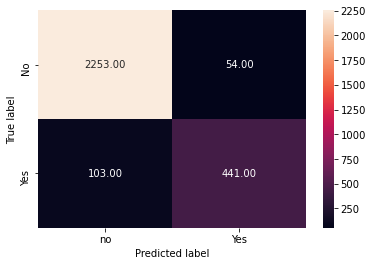

In [41]:
import seaborn as sns

cm = metrics.confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Unsupervised learning techniques, such as topic modelling and other techniques such as term frequency counting,time period segmented dataset; qualitative assessment will be done on the results to help us understand the job postings.

In [15]:
# train a LDA Model

from sklearn.decomposition import LatentDirichletAllocation

lda_model =LatentDirichletAllocation(n_components=15, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['knowledge education higher relevant experience field english russian work languages',
 'communicative timely punctual openminded selfconfident manner eager complete email skills',
 'driving license knowledge medical skills work education pharmaceutical russian experience',
 'sql knowledge net c server experience aspnet development work good',
 'skills ability marketing experience business management work sales knowledge strong',
 'skills knowledge excellent russian armenian languages work good strong experience',
 'personality fast accept learner criticism player good ability motivated team',
 'adobe photoshop draw corel illustrator design graphic knowledge flash work',
 'accounting finance knowledge tax armenian standards work financial experience software',
 'skills excellent work knowledge ability languages russian ms armenian office',
 'experience skills ability management international work knowledge excellent degree armenian',
 'banking knowledge skills bank work law financial 

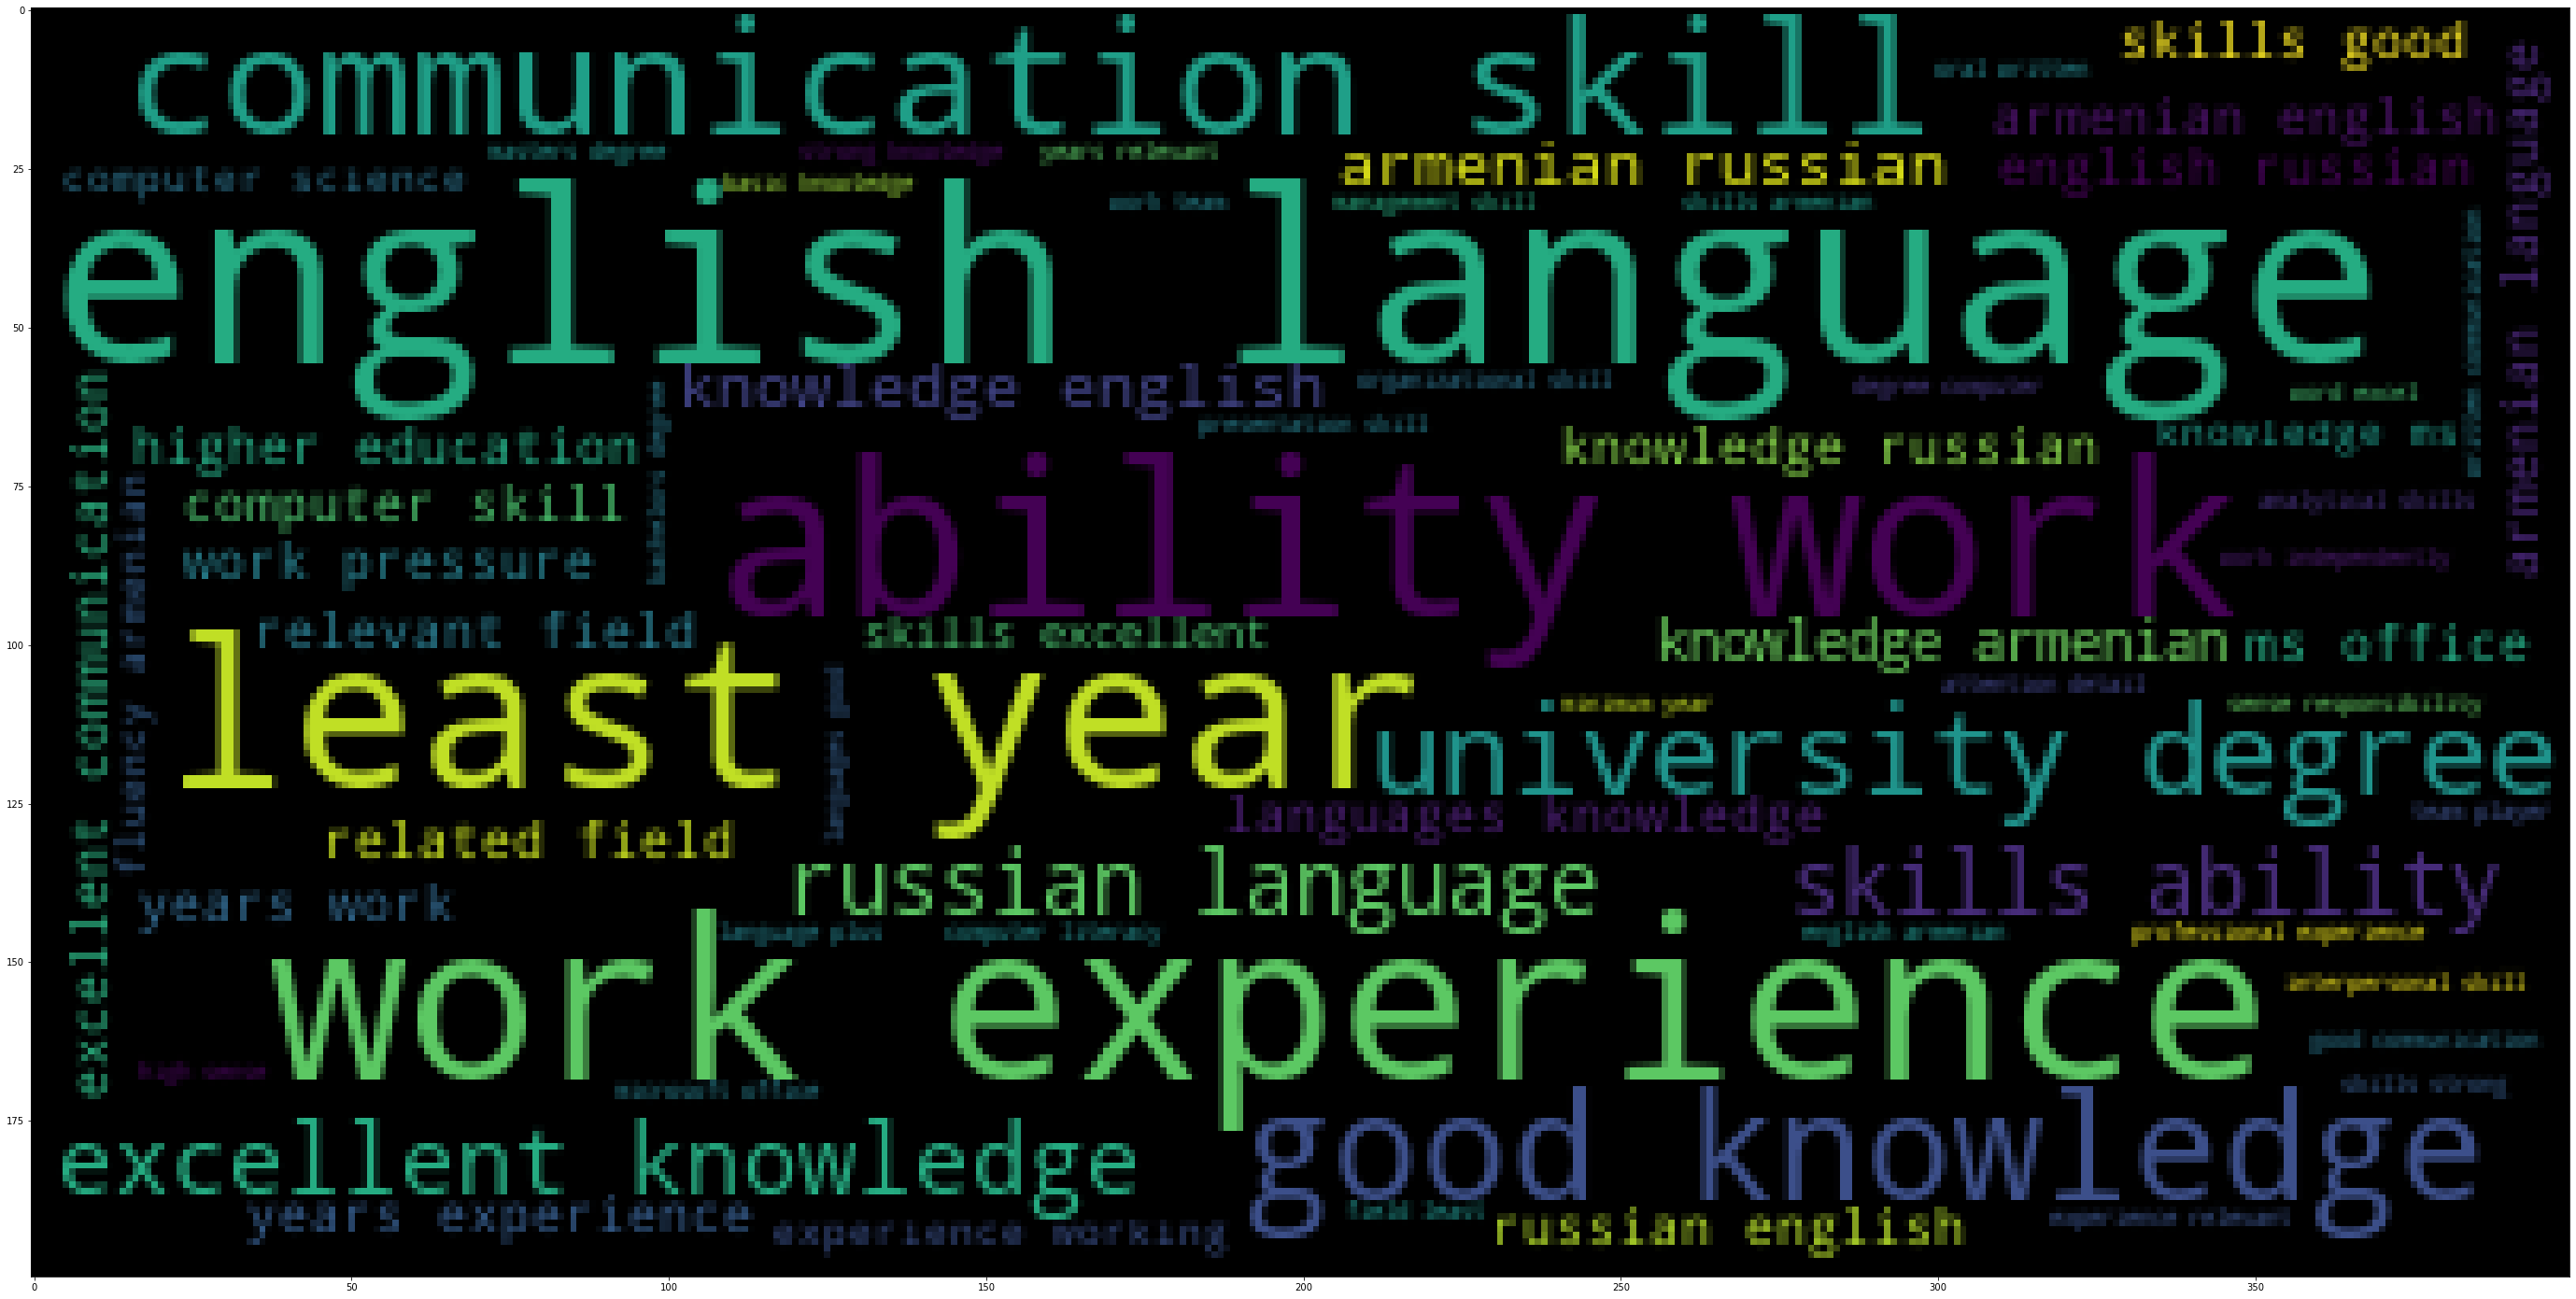

In [48]:
# Creation of word-cloud.

from wordcloud import WordCloud ,STOPWORDS

wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))
fig = plt.figure(figsize=(200,25))
plt.imshow(wordcloud)

Unsupervised Learning, to understand the desired characteristics and skill-sets demanded by employers in the job ads.

In [16]:
u1=posting[['RequiredQual']]

In [17]:
u1['RequiredQual'] = u1['RequiredQual'].astype(str)

In [18]:
def clean(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)  # Remove punctuations
    text=text.lower()                                        # Convert text to lower
    return(text)

u1['RequiredQual']=u1['RequiredQual'].apply(lambda x:clean(x))
u1['RequiredQual'].head(3)

0    to perform this job successfully, an\nindividu...
1    - bachelor's degree; master's is preferred;\n-...
2    - degree in environmentally related field, or ...
Name: RequiredQual, dtype: object

In [19]:
# tokenize text with Tfidf, with uni-gram, bi-gram, tri-gram & quad-gram.

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(u1['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [20]:
X_train = vectorizer.transform(u1['RequiredQual'])
vocab = vectorizer.get_feature_names()
vocab[:10]

['ability',
 'ability work',
 'ability work pressure',
 'accounting',
 'advanced',
 'analytical',
 'armenian',
 'armenian english',
 'armenian russian',
 'armenian russian english']

In [21]:
# get the tf-idf table, with uni-gram & bi-gram  

vectorizer1 = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer1.fit(u1['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=0.05, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [22]:
# Create a training data

X_train = vectorizer1.transform(u1['RequiredQual'])

In [23]:
# Use SVD to reduce dimensions

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [79]:
from sklearn.metrics import silhouette_score

for n_clusters in np.arange(4,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_lsa)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_lsa, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 4, silhouette score is 0.03152354695229374
For n_clusters = 5, silhouette score is 0.03290014106368422
For n_clusters = 6, silhouette score is 0.03236467909167405
For n_clusters = 7, silhouette score is 0.03391149407540714
For n_clusters = 8, silhouette score is 0.03383335323716373
For n_clusters = 9, silhouette score is 0.029356770801074055
For n_clusters = 10, silhouette score is 0.03307377192884578


In [80]:
model = KMeans(n_clusters=7, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)
res = model.fit(X_train)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [119]:
# Getting the vocalbulary as well as cluster centers

# Firstly, set of words from the tf-idf itself
vocab = vectorizer1.get_feature_names()
vocab = np.array(vocab)

# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

# get top 10 words from that cluster
print('Top-10 words from each of 7 clusters: ')
print('\n')
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

Top-10 words from each of 7 clusters: 


{'work experience', 'language', 'experience', 'years', 'relevant', 'degree', 'knowledge', 'english language', 'english', 'work'}
{'language', 'relevant', 'programming', 'degree', 'software', 'design', 'good', 'english', 'development', 'work experience', 'experience', 'years', 'web', 'ability', 'knowledge', 'english language', 'skills', 'work'}
{'language', 'management', 'relevant', 'international', 'programming', 'degree', 'software', 'design', 'good', 'english', 'development', 'work experience', 'experience', 'years', 'web', 'ability', 'knowledge', 'business', 'excellent', 'english language', 'skills', 'strong', 'work'}
{'language', 'management', 'relevant', 'international', 'programming', 'degree', 'software', 'design', 'good', 'pressure', 'english', 'development', 'skills ability', 'work experience', 'experience', 'years', 'web', 'ability work', 'ability', 'work pressure', 'knowledge', 'business', 'excellent', 'english language', 'skills', 's

The top 5 most similar job posting

In [24]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')

In [30]:
jb_posting['AboutC']=jb_posting['AboutC'].fillna(jb_posting['AboutC'].mode().iloc[0])
jb_posting['AboutC'].head()

0    Mentor Graphics Development Services CJSC is a...
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3    Mentor Graphics Development Services CJSC is a...
4    Mentor Graphics Development Services CJSC is a...
Name: AboutC, dtype: object

In [31]:
matcher = Matcher(nlp.vocab)

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [32]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

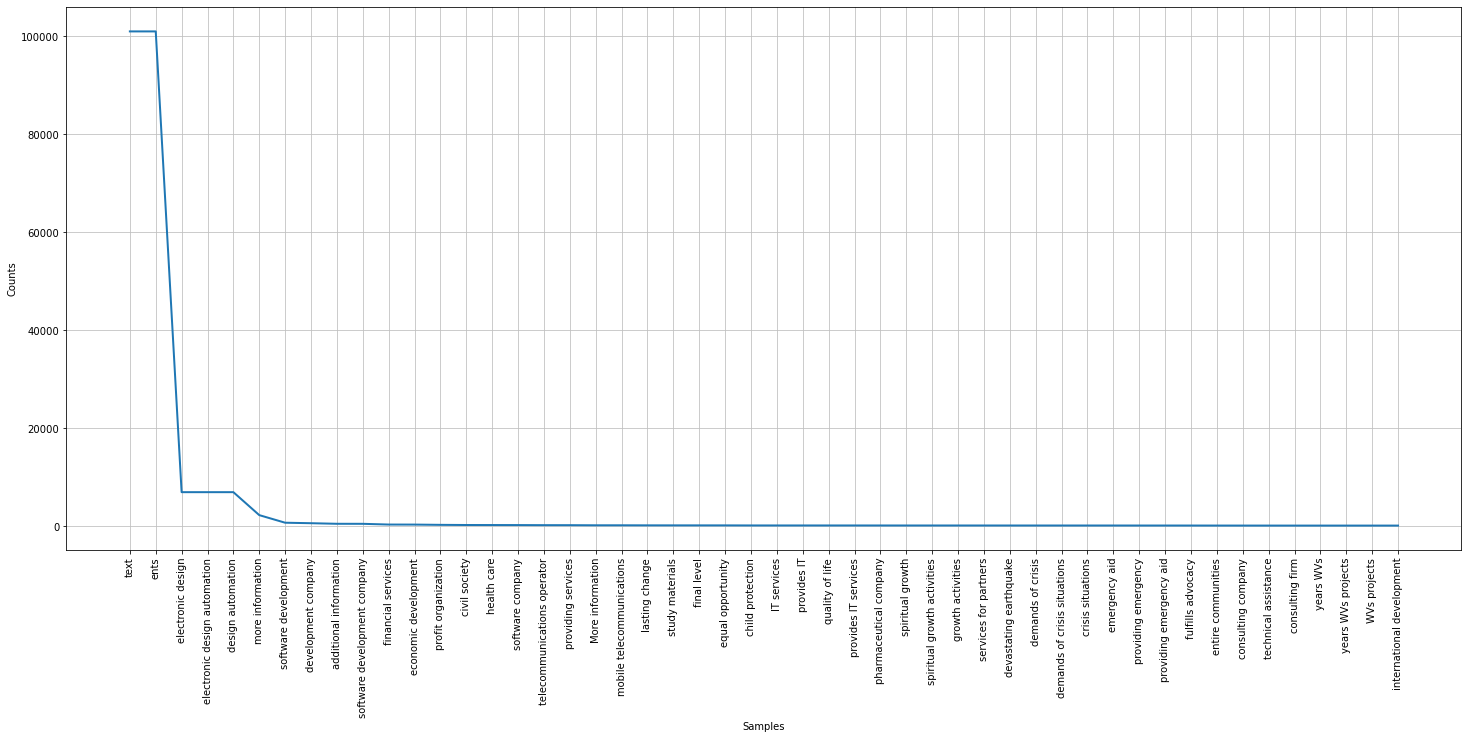

In [34]:
matched_sents=[]
for t in jb_posting.AboutC:
    if pd.notnull(t) and t != 'NaN':
        t = re.sub(r'\s+', ' ', t)
        doc = nlp(t)
        matches = matcher(doc)
        token_set = []
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            token_set.append(span.text)    
        matched_sents.append(token_set)
        
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

plt.figure(figsize=(25, 10))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)
plt.show()

Job-Similarity

In [37]:
from nltk.tokenize import word_tokenize

In [35]:
js=df1=jb_posting[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]

In [38]:
js['JobDescription_token'] = js['JobDescription'].map(word_tokenize)
js['RequiredQual_token'] = js['RequiredQual'].map(word_tokenize)
js['JobRequirment_token'] = js['JobRequirment'].map(word_tokenize)

tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(df1['Title'])
JobDescription_tfidf = tfidf_model.fit_transform(js['JobDescription'])
RequiredQual_tfidf = tfidf_model.fit_transform(js['RequiredQual'])
JobRequirment_tfidf = tfidf_model.fit_transform(js['JobRequirment'])

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine +JobDescription_tfidf_cosine+RequiredQual_tfidf_cosine+JobRequirment_tfidf_cosine)/4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

In [40]:
js.iloc[0]

jobpost                 AMERIA Investment Consulting Company\nJOB TITL...
Title                                             Chief Financial Officer
JobRequirment           - Supervises financial management and administ...
JobDescription          AMERIA Investment Consulting Company is seekin...
RequiredQual            To perform this job successfully, an\nindividu...
JobDescription_token    [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token      [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token     [-, Supervises, financial, management, and, ad...
Name: 0, dtype: object

So, this index number contains job related to "Finance-management supervisor", as evident from 'JobRequirment'. Below we'll find jobs similar to this job-posting.

In [42]:
for index, score in find_similar_jobs_tfidf(0):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Organization for Implementation of North-South...
Title                                             Chief Financial Officer
JobRequirment           Financial management of the NSRCIP T1 & T2 pro...
JobDescription          The Chief Financial Officer (CFO) will support...
RequiredQual            - Degree in Accounting, Finance, Business, Law...
JobDescription_token    [The, Chief, Financial, Officer, (, CFO, ), wi...
RequiredQual_token      [-, Degree, in, Accounting, ,, Finance, ,, Bus...
JobRequirment_token     [Financial, management, of, the, NSRCIP, T1, &...
Name: 12368, dtype: object
SIMILARITY SCORE:  0.49834474358571085
jobpost                 River Island\nTITLE:  Chief Financial Officer\...
Title                                             Chief Financial Officer
JobRequirment           - Develop tools and systems to provide critica...
JobDescription          River Island is seeking a Chief Financial Offi...
RequiredQual            - Master's degree in M

In [44]:
js.iloc[1]

jobpost                 International Research & Exchanges Board (IREX...
Title                   Full-time Community Connections Intern (paid i...
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 1, dtype: object

In [46]:
# Job similar to 'IREX board'.

for index, score in find_similar_jobs_tfidf(1):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 International Research & Exchanges Board (IREX...
Title                    Non-paid part or full time Administrative Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication skills;\n- Good oral...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Excellent, communication, skills, ;, -, Go...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 11, dtype: object
SIMILARITY SCORE:  0.6798353526927008
jobpost                 International Research & Exchanges Board (IREX...
Title                      Non-paid part or full time Programmatic Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication 

In [47]:
js.iloc[2]

jobpost                 Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                 Country Coordinator
JobRequirment           - Working with the Country Director to provide...
JobDescription          Public outreach and strengthening of a growing...
RequiredQual            - Degree in environmentally related field, or ...
JobDescription_token    [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token      [-, Degree, in, environmentally, related, fiel...
JobRequirment_token     [-, Working, with, the, Country, Director, to,...
Name: 2, dtype: object

In [48]:
# Job similar to 'Caucasus Environmental NGO Network.'

for index, score in find_similar_jobs_tfidf(2):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Caucasus Environmental NGO Network\nTITLE:  Co...
Title                                       Country Coordinator - Armenia
JobRequirment           -  Write first hand articles, conduct intervie...
JobDescription          CENN - Caucasus Environmental NGO Network - is...
RequiredQual            1. Education: University education in environm...
JobDescription_token    [CENN, -, Caucasus, Environmental, NGO, Networ...
RequiredQual_token      [1, ., Education, :, University, education, in...
JobRequirment_token     [-, Write, first, hand, articles, ,, conduct, ...
Name: 404, dtype: object
SIMILARITY SCORE:  0.4320651188012762
jobpost                 Veya  Ltd.\n\n\nTITLE:  Country Coordinator\n\...
Title                                                 Country Coordinator
JobRequirment           - Negotiate with potential customers;\n- Lobby...
JobDescription          Veya Ltd. is looking for a qualified Country\n...
RequiredQual            - At least 5 years of exp

Pretrained Word2Vec Embedding

In [50]:
#spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [51]:
nlp = spacy.load('en_core_web_lg')

# Original text - Title
doc1 = nlp(js.iloc[0]['Title'])
doc2 = nlp(js.iloc[2]['Title'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)


DOC1:
Chief Financial Officer 

DOC2:
 Country Coordinator 

 0.5373299805896293


In [52]:
# Original text - RequiredQual

doc1 = nlp(df1.iloc[0]['RequiredQual'])
doc2 = nlp(df1.iloc[2]['RequiredQual'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully, an
individual must be able to perform each essential duty satisfactorily.
The requirements listed below are representative of the knowledge,
skill, and/or ability required.
Knowledge of:
- Generally accepted accounting principles;
- Local accounting standards and legislation;
- State reporting requirements pertaining to accounting;
- Principles and practices of financial management and budgeting;
- Principles and practices of financial systems design and analysis;
- Principles and practices of contract management, records management,
and risk management;
- Principles and practices of management and supervision;
- Principles and practices of information systems management.
Ability to:
- Apply sound fiscal and administrative practices to the company's
activities;
- Plan, organize and supervise the work of subordinate employees,
including training them, assigning and evaluating their work, and
providing job performance feedback;
- Critically analyze

In [53]:
# removing stopwords and punctuations

doc1 = nlp(' '.join(df1.iloc[0]['RequiredQual_token']))
doc2 = nlp(' '.join(df1.iloc[2]['RequiredQual_token']))
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully , an individual must be able to perform each essential duty satisfactorily . The requirements listed below are representative of the knowledge , skill , and/or ability required . Knowledge of : - Generally accepted accounting principles ; - Local accounting standards and legislation ; - State reporting requirements pertaining to accounting ; - Principles and practices of financial management and budgeting ; - Principles and practices of financial systems design and analysis ; - Principles and practices of contract management , records management , and risk management ; - Principles and practices of management and supervision ; - Principles and practices of information systems management . Ability to : - Apply sound fiscal and administrative practices to the company's activities ; - Plan , organize and supervise the work of subordinate employees , including training them , assigning and evaluating their work , and providing job performance feedback

In [54]:
# POS-tagging & REG~Ex matcher.

matcher = Matcher(nlp.vocab)

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })
    
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [63]:
# RequiredQual

for job1_idx in range(js.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', js.iloc[job1_idx]['RequiredQual'])
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    js.at[job1_idx, 'RequiredQual_keywords']= (" ".join(keywords))

In [64]:
# JobDescription

for job1_idx in range(js.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(js.iloc[job1_idx]['JobDescription']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    js.at[job1_idx, 'JobDescription_keywords']= (" ".join(keywords))

In [65]:
# JobRequirment

for job1_idx in range(js.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(js.iloc[job1_idx]['JobRequirment']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    js.at[job1_idx, 'JobRequirment_keywords']=(" ".join(keywords))

In [66]:
js.head(3)

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,JobDescription_token,RequiredQual_token,JobRequirment_token,RequiredQual_keywords,JobDescription_keywords,JobRequirment_keywords
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...","[AMERIA, Investment, Consulting, Company, is, ...","[To, perform, this, job, successfully, ,, an, ...","[-, Supervises, financial, management, and, ad...",essential duty accepted accounting accepted ac...,administrative functions complex staff complex...,financial management administrative staff assi...
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,- Participate in application design;\n- Provid...,The incumbent will work under the direct super...,- Bachelor's Degree; Master's is preferred;\n-...,"[The, incumbent, will, work, under, the, direc...","[-, Bachelor, 's, Degree, ;, Master, 's, is, p...","[-, Participate, in, application, design, ;, -...",Excellent skills Armenian languages Armenian t...,direct supervision front desk,application design design documentation local ...
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...","[Public, outreach, and, strengthening, of, a, ...","[-, Degree, in, environmentally, related, fiel...","[-, Working, with, the, Country, Director, to,...",related field relevant experience written flue...,Public outreach growing network international ...,environmental information general public elect...


In [67]:
job_dissimilarity_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

for job1_idx in range(3):  # rows
    for job2_idx in range(1000):

        doc1 = nlp(df1.iloc[job1_idx]['Title'])
        doc2 = nlp(df1.iloc[job2_idx]['Title'])
        title_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobDescription_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobDescription_keywords'])
        jd_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobRequirment_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobRequirment_keywords'])
        jr_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['RequiredQual_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['RequiredQual_keywords'])
        rq_similarity = doc1.similarity(doc2)
        
        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        job_dissimilarity_df = job_dissimilarity_df.append({'index': job1_idx, 'similar-job': job2_idx, 
                                                            'dissimilar-score': (1-averaged_score)},ignore_index=True)


In [68]:
# Top similar jobs

job_dissimilarity_df_sorted = job_dissimilarity_df.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
697,0.0,697.0,0.069082
926,0.0,926.0,0.111218
120,0.0,120.0,0.113904
29,0.0,29.0,0.122753
420,0.0,420.0,0.123143
126,0.0,126.0,0.124174
479,0.0,479.0,0.129356
778,0.0,778.0,0.132108
234,0.0,234.0,0.136706


In [69]:
# Show top 5 similar results to job - Ameria Investment Consulting Job

similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 0].head(6)['similar-job'].tolist()
for job in similar_jobs:
    print(df1.iloc[int(job)].replace(r'\n',' ', regex=True))

jobpost                    AMERIA Investment Consulting Company JOB TITLE...
Title                                                Chief Financial Officer
JobRequirment              - Supervises financial management and administ...
JobDescription             AMERIA Investment Consulting Company is seekin...
RequiredQual               To perform this job successfully, an individua...
JobDescription_token       [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token         [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token        [-, Supervises, financial, management, and, ad...
RequiredQual_keywords      essential duty accepted accounting accepted ac...
JobDescription_keywords    administrative functions complex staff complex...
JobRequirment_keywords     financial management administrative staff assi...
Name: 0, dtype: object
jobpost                    Cascade Capital Holdings CJSC TITLE:  Chief Fi...
Title                                                

In [70]:
# Show top 5 similar results to job - International Research & Exchange Board

similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 1].head(6)['similar-job'].tolist()
for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    International Research & Exchanges Board (IREX...
Title                      Full-time Community Connections Intern (paid i...
JobRequirment              - Participate in application design;\n- Provid...
JobDescription             The incumbent will work under the direct super...
RequiredQual               - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token       [The, incumbent, will, work, under, the, direc...
RequiredQual_token         [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token        [-, Participate, in, application, design, ;, -...
RequiredQual_keywords      Excellent skills Armenian languages Armenian t...
JobDescription_keywords                        direct supervision front desk
JobRequirment_keywords     application design design documentation local ...
Name: 1, dtype: object
jobpost                    International Research & Exchanges Board (IREX...
Title                       Non-paid part or full tim

In [71]:
# Show top 5 similar results to job - Caucasus Environmental NGO Network

similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 2].head(6)['similar-job'].tolist()
for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                    Country Coordinator
JobRequirment              - Working with the Country Director to provide...
JobDescription             Public outreach and strengthening of a growing...
RequiredQual               - Degree in environmentally related field, or ...
JobDescription_token       [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token         [-, Degree, in, environmentally, related, fiel...
JobRequirment_token        [-, Working, with, the, Country, Director, to,...
RequiredQual_keywords      related field relevant experience written flue...
JobDescription_keywords    Public outreach growing network international ...
JobRequirment_keywords     environmental information general public elect...
Name: 2, dtype: object
jobpost                    International Medical Corps\nJOB TITLE:   Coun...
Title                                                